In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from ResoFit._pulse_shape import NeutronPulse
from ResoFit._pulse_shape import ProtonPulse
from ResoFit.experiment import Experiment
import numpy as np
from ResoFit.simulation import Simulation
overwrite_csv = False
import scipy.signal as ss
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode()
import plotly.graph_objs as go

In [5]:
%matplotlib notebook

In [2]:
folder = 'data/IPTS_19558/reso_data_19558'
data_file1 = 'Gd_thick.csv'
spectra_file = 'Image002_Spectra.txt'
experiment1 = Experiment(data_file=data_file1,
                         spectra_file=spectra_file,
                         folder=folder,
                         baseline=True)
# experiment1.slice(slice_start=300, reset_index=False)
# peak_df = experiment1.find_peak()

In [3]:
source_to_detector_m = 16.45
simulation = Simulation(energy_min=7, energy_max=150, energy_step=0.1, database='ENDF_VII')
simulation.add_layer(layer='Gd', layer_thickness_mm=0.15)
simulation._convolve_neutron_beam_shape(source_to_detector_m=source_to_detector_m)

'/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Neutron_fitted_params_1eV_500eV_ikeda_carpenter.csv' exists...
Fitted parameters file loaded.
'/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Loglog_linear_within_1eV_500eV_ikeda_carpenter.csv' exists...
Parameters linear fitted file loaded.
'/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/TOF_shape_eV_7.0_150.0_0.1_us_0.05_5500000.0_184_for_sum_16.45m_ikeda_carpenter.csv' exists...
TOF neutron beam shape file loaded.


<IPython.core.display.Javascript object>


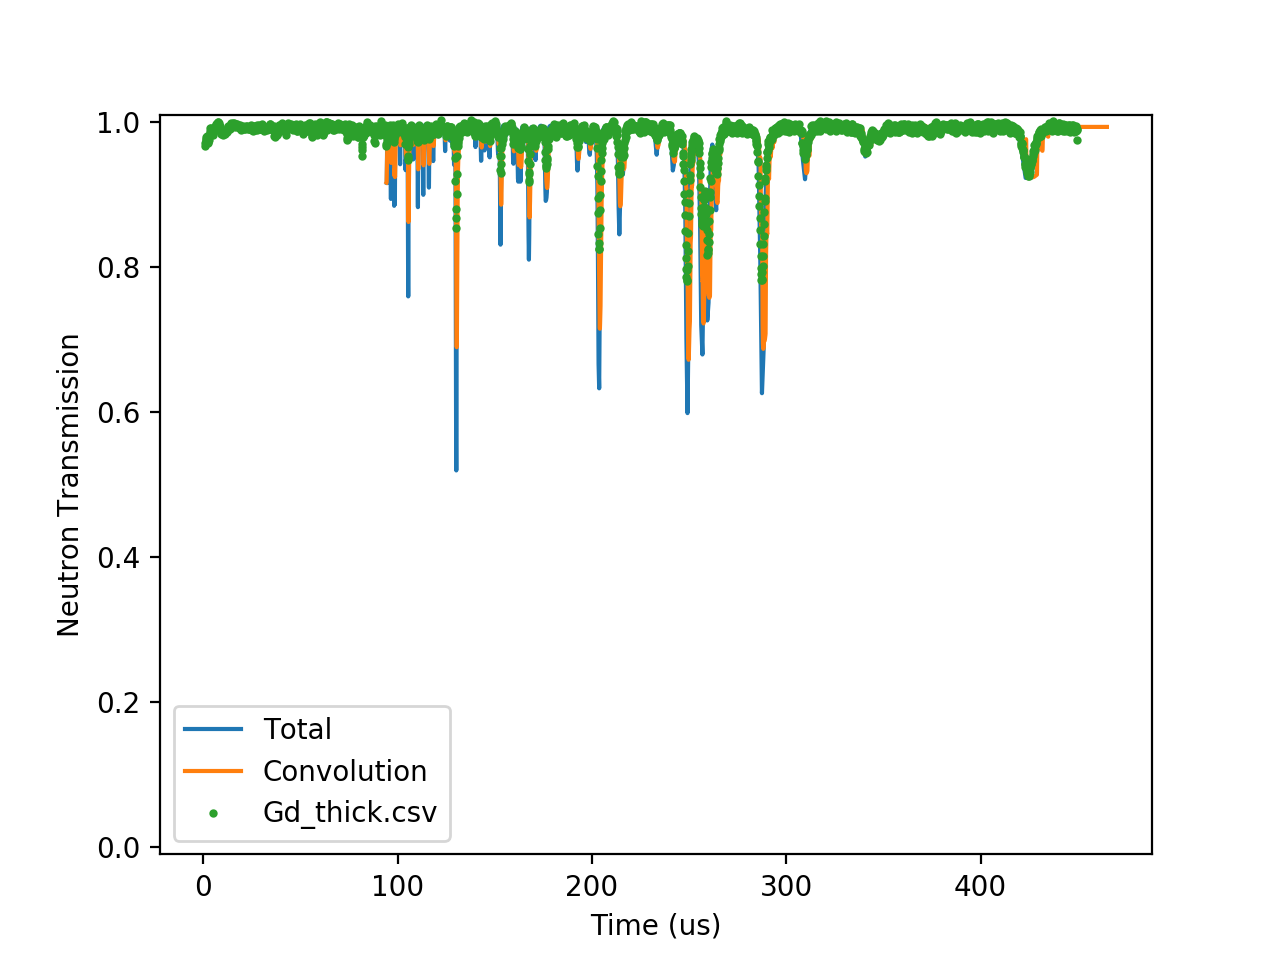

'Time (us)' was obtained with the following:
source_to_detector_m=16.45
offset_us=2.67


In [6]:
simulation.plot_simu(x_type='time', y_type='transmission', source_to_detector_m=source_to_detector_m, offset_us=2.67)
plt.plot(simulation.x_tof_us-2.9, 1-simulation.y_att, label='Convolution')
experiment1.plot_raw(x_type='time', y_type='transmission', time_unit='us')

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  1.984e+04     -inf      inf    36.58     True     None     None
center         1909     -inf      inf   0.3126     True     None     None
fwhm          345.7     -inf      inf   0.7362    False 2.3548200*sigma     None
height         53.9     -inf      inf  0.09941    False 0.3989423*amplitude/max(1.e-15, sigma)     None
sigma         146.8        0      inf   0.3126     True     None     None


/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/lmfit/models.py:30: FutureWarning:

'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.



<IPython.core.display.Javascript object>


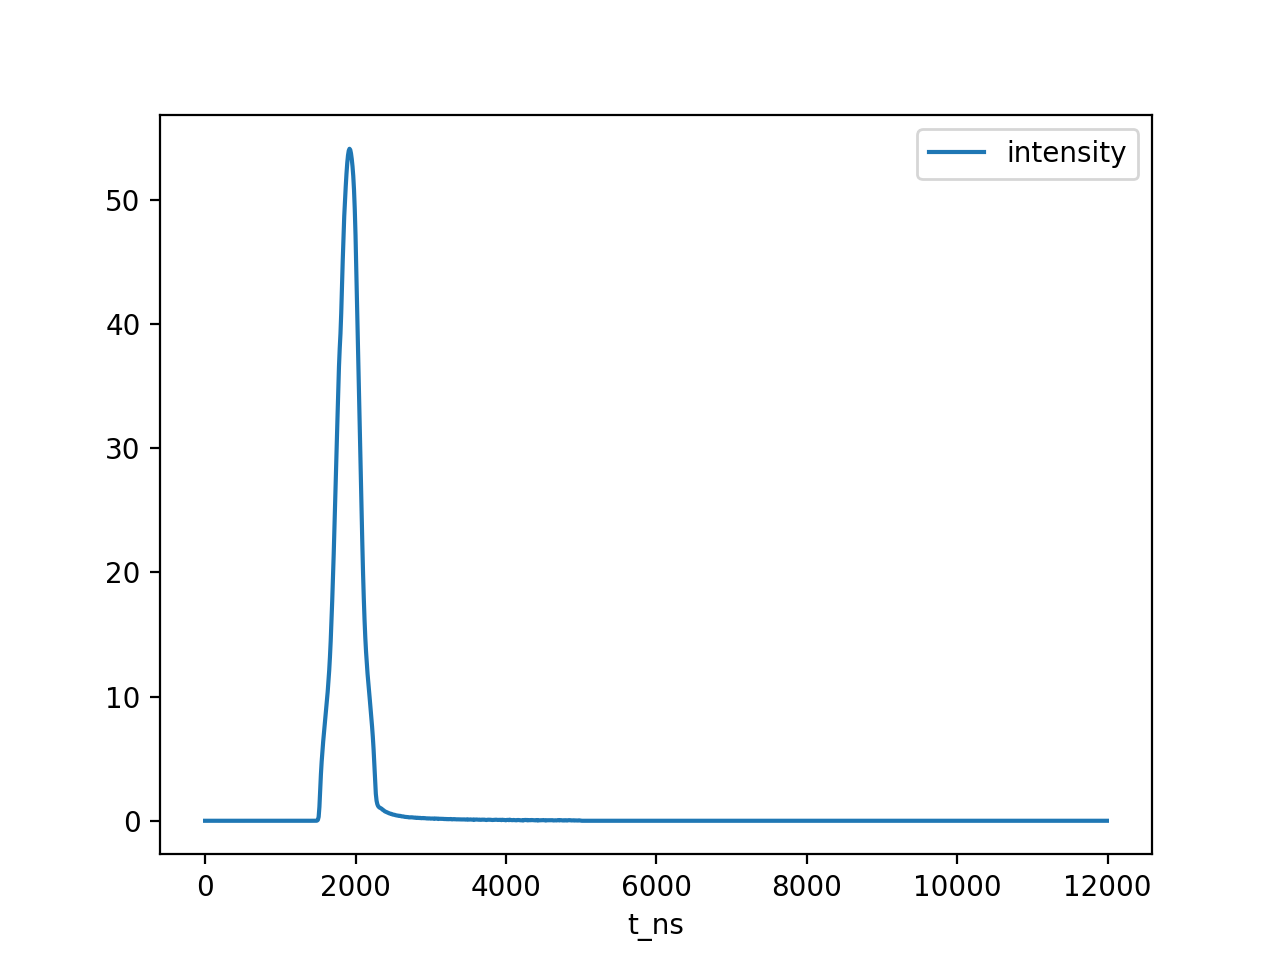

In [26]:
simulation.neutron_pulse.proton_pulse.fit_shape()
simulation.neutron_pulse.proton_pulse._shape_df.set_index('t_ns').plot()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude         1     -inf      inf     None     True     None     None
center         1909     -inf      inf   0.3126     True     None     None
fwhm          345.7     -inf      inf   0.7362    False 2.3548200*sigma     None
height     0.002717     -inf      inf  0.09941    False 0.3989423*amplitude/max(1.e-15, sigma)     None
sigma         146.8        0      inf   0.3126     True     None     None


<IPython.core.display.Javascript object>


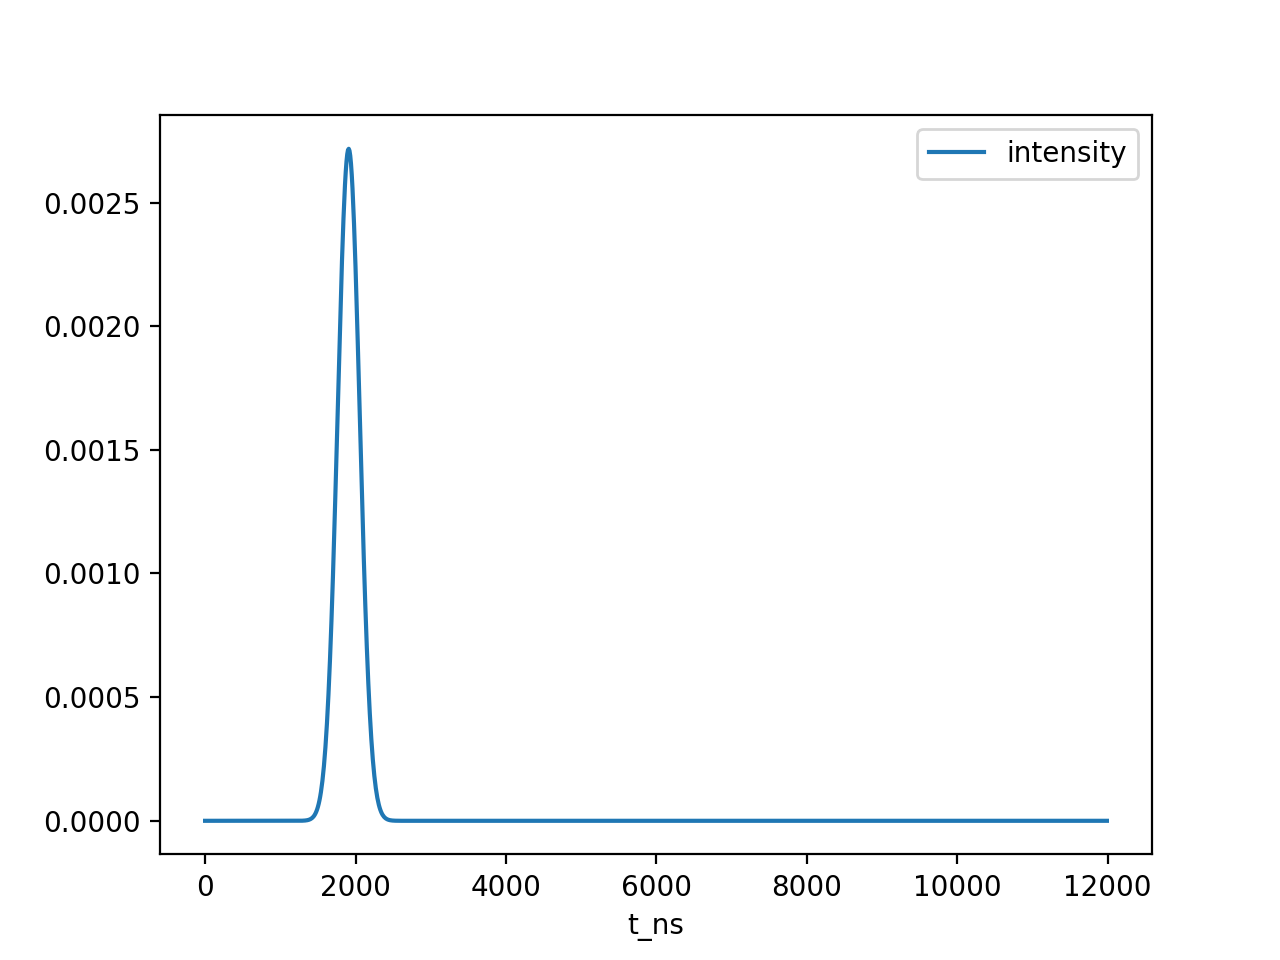

In [27]:
simulation.neutron_pulse.proton_pulse.make_new_shape(amplitude=1)
simulation.neutron_pulse.proton_pulse.new_shape_df.set_index('t_ns').plot()

In [28]:
shape_df = simulation.neutron_pulse.proton_pulse._shape_df
new_shape_df = simulation.neutron_pulse.proton_pulse.new_shape_df
# simulation.neutron_pulse.proton_pulse.trunc_df(rel_tol=1e-7)
# simulation.neutron_pulse.proton_pulse.trunc_df()
_new_shape_df = simulation.neutron_pulse.proton_pulse._new_shape_df

<IPython.core.display.Javascript object>


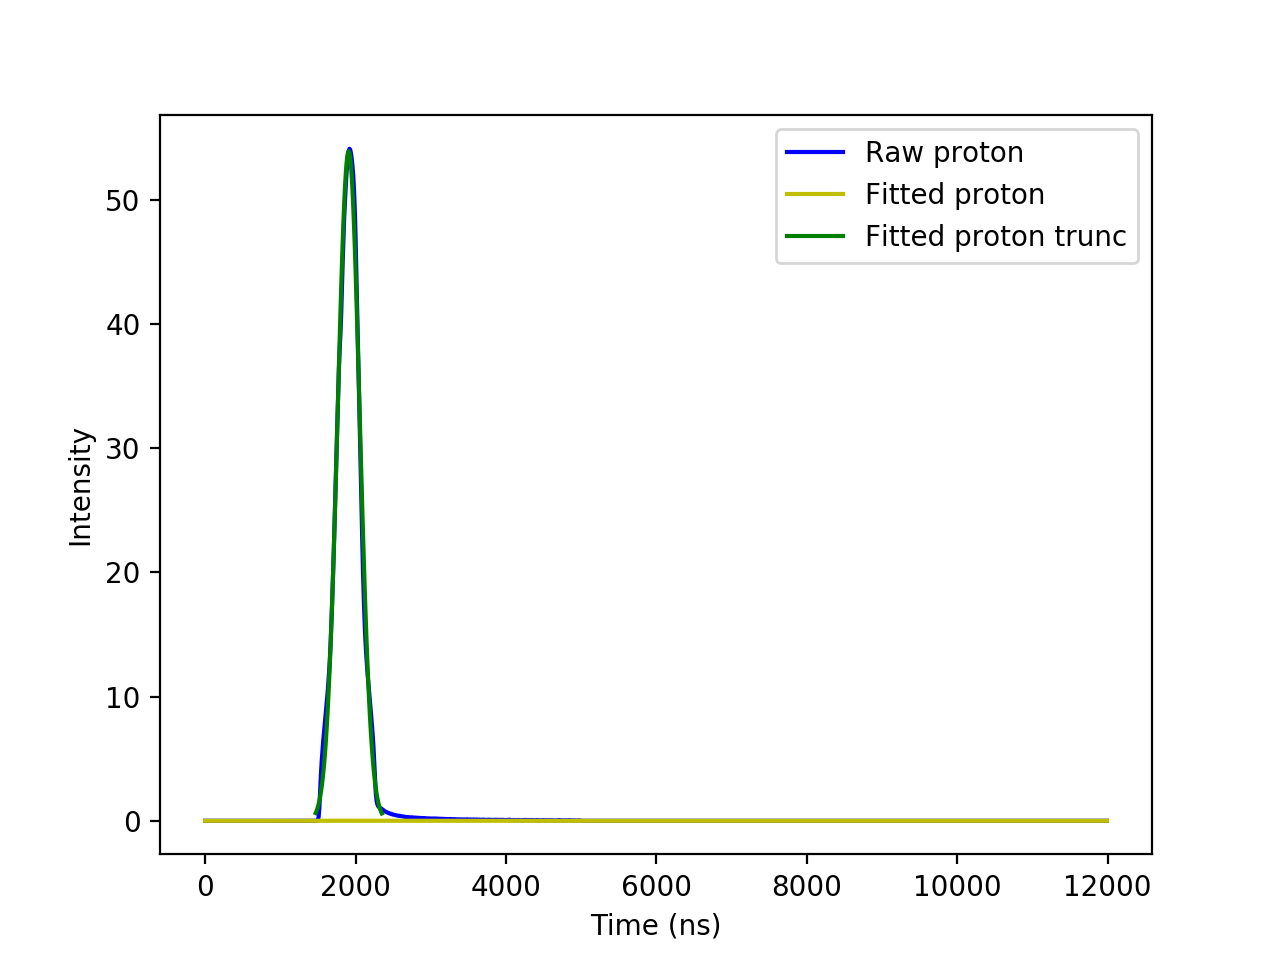

Text(0,0.5,'Intensity')

In [29]:
f1, ax1 = plt.subplots()
ax1.plot(shape_df['t_ns'], shape_df['intensity'], 'b-', label='Raw proton')
ax1.plot(new_shape_df['t_ns'], new_shape_df['intensity'], 'y-', label='Fitted proton')
ax1.plot(_new_shape_df['t_ns'], _new_shape_df['intensity'], 'g-', label='Fitted proton trunc')
ax1.legend()
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Intensity')

In [20]:
trans = 1 - simulation.y_att
# con = np.convolve(_new_shape_df['intensity']/1.984e+03, trans, mode='same')
con = np.convolve(trans, _new_shape_df['intensity']/1.984e+03, mode='same')

<IPython.core.display.Javascript object>


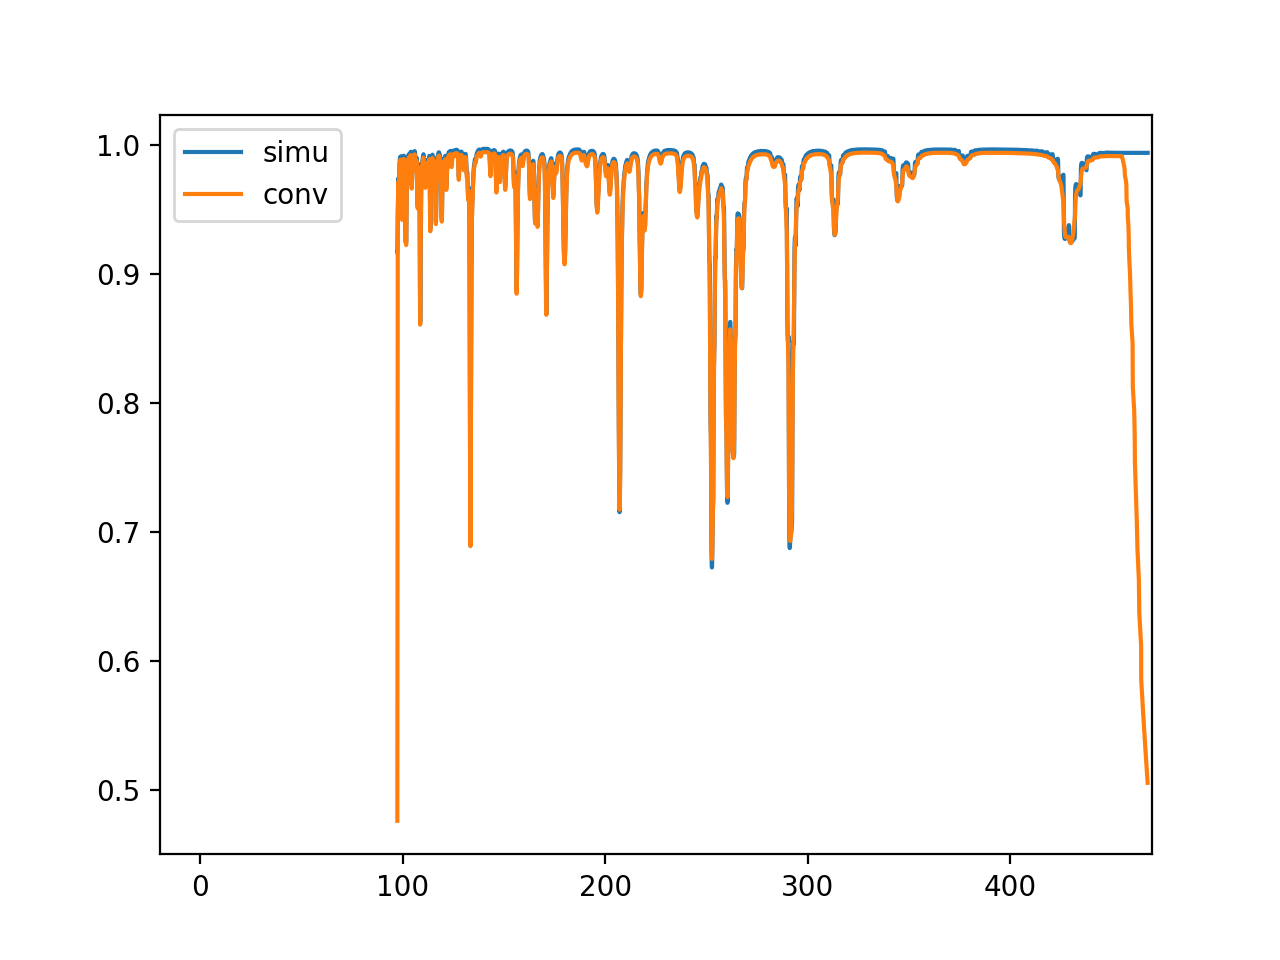

In [22]:
f3, ax3 = plt.subplots()
ax3.plot(simulation.x_tof_us, trans, label='simu')
ax3.plot(simulation.x_tof_us, con, label='conv')
ax3.set_xlim(left=-20, right=470)
ax3.legend()

<IPython.core.display.Javascript object>


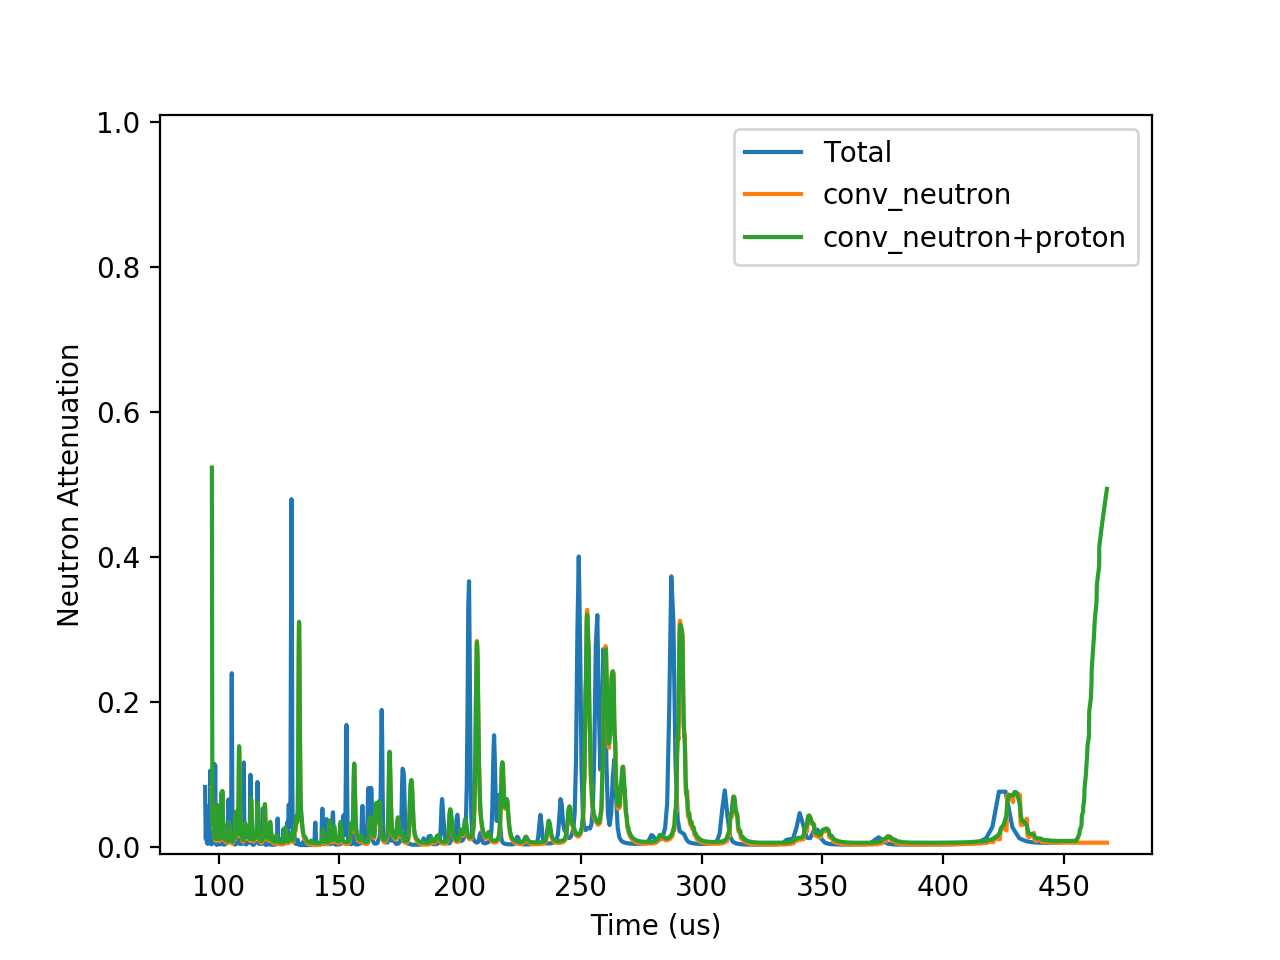

'Time (us)' was obtained with the following:
source_to_detector_m=16.45
offset_us=2.67


In [15]:
simulation.plot_simu(x_type='time', source_to_detector_m=source_to_detector_m, offset_us=2.67)
plt.plot(simulation.x_tof_us, 1-trans, label='conv_neutron')
plt.plot(simulation.x_tof_us, 1-con, label='conv_neutron+proton')
plt.legend()

<IPython.core.display.Javascript object>


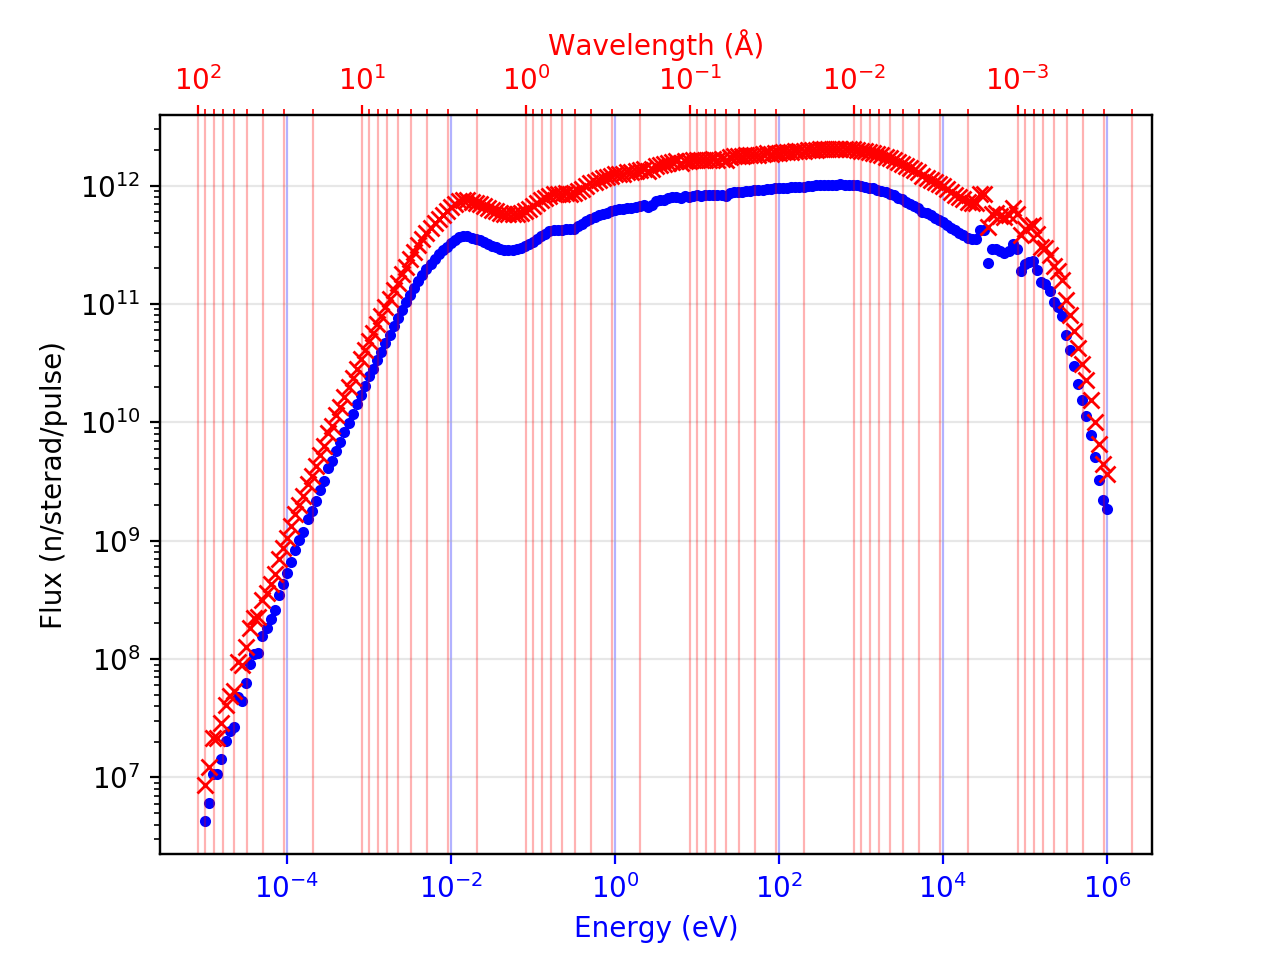

In [24]:
mpl_fig = simulation.neutron_pulse.plot_shape_total()

In [61]:
tof_us = simulation.neutron_pulse.shape_tof_df_interp['tof_us']

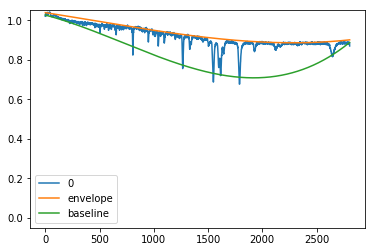

In [7]:
experiment1.data.plot()
envelope = pku.envelope(arr0)
plt.plot(envelope, label='envelope')
baseline = pku.baseline(arr0)
plt.plot(baseline, label='baseline')
plt.ylim(bottom=-0.05, top=1.05)
plt.legend()

(-0.05, 1.05)

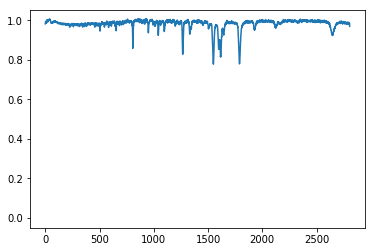

In [8]:
arr1 = arr0 + (1-envelope)
plt.plot(arr1)
plt.ylim(bottom=-0.05, top=1.05)